# Visualize Deep Learning Training with History Callback

- Tutorial: http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
- History Callback is a default called back registered with Keras training process. The history object is returned from calls to the fit() function used to train the model

## Preparing the Dataset

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.data_utils import get_file
import matplotlib.pyplot as plt
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
path = get_file('pima-indians-diabetes.data', origin="http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data")
dataset = numpy.loadtxt(path, delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

## Plot different loss functions

The interesting thing about neural network is it employs fixed loss function and keras comes pre-baked with a bunch of them. We can compare these functions by plotting them separately.

In [15]:
def bce_loss_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def mean_squared_loss_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
    model.add(Dense(8, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

def plot(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#### 1. Binary Cross-Entropy

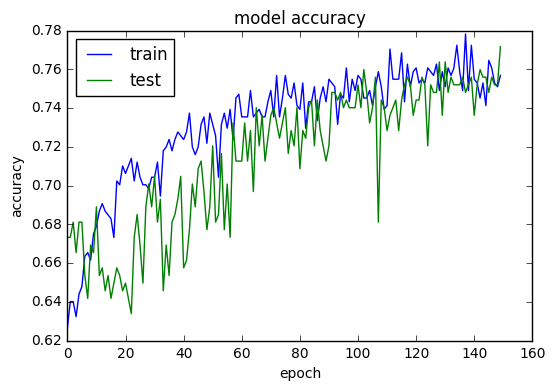

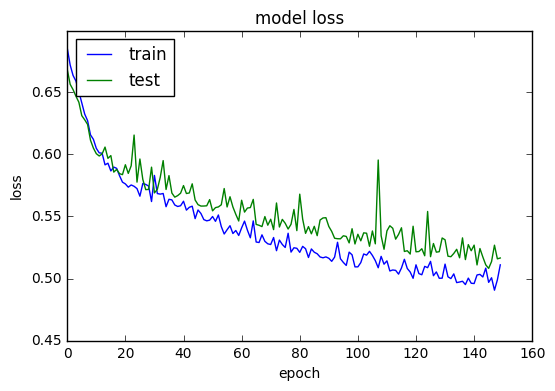

In [13]:
model = bce_loss_model()
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)
plot(history)

#### 2. Mean Squared Error

In [ ]:
model = mean_squared_loss_model()
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)
plot(history)